In [11]:
from sympy import *
from sympy.simplify.fu import *

In [87]:
r, phi = symbols('r phi', nonnegative=True)
x, y, z = symbols('x y z', real=True)

In [40]:
n = Matrix([cos(phi/2), sin(phi/2), 0])
n

Matrix([
[cos(phi/2)],
[sin(phi/2)],
[         0]])

In [45]:
half_angle = {sin(phi/2): sqrt((1 - cos(phi))/2),
              cos(phi/2): sqrt((1 + cos(phi))/2)}
double_angle = {sqrt(1 - cos(phi)): sqrt(2) * sin(phi/2),
                sqrt(1 + cos(phi)): sqrt(2) * cos(phi/2)}
cartesian_conversion = {cos(phi): x/sqrt(x**2 + y**2), sin(phi): y/sqrt(x**2 + y**2)}
polar_conversion = {x: r*cos(phi), y:r*sin(phi)}

In [42]:
n_cart = simplify(n.subs(half_angle).subs(cartesian_conversion))
n_cart

Matrix([
[ sqrt(2*x/sqrt(x**2 + y**2) + 2)/2],
[sqrt(-2*x/sqrt(x**2 + y**2) + 2)/2],
[                                 0]])

In [56]:
def div(n):
    return n[0].diff(x) + n[1].diff(y) + n[2].diff(z)

def curl(n):
    return Matrix([n[2].diff(y) - n[1].diff(z),
                   n[0].diff(z) - n[2].diff(x),
                   n[1].diff(x) - n[0].diff(y)])

def cross(n, m):
    return Matrix([n[1]*m[2] - n[2]*m[1],
                   n[2]*m[0] - n[0]*m[2],
                   n[0]*m[1] - n[1]*m[0]])

def dot(n, m):
    return n[0]*m[0] + n[1]*m[1] + n[2]*m[2]

def square(n):
    return dot(n, n)

# Calculate for unrotated director

In [57]:
splay = div(n_cart)**2
bend = square(cross(n_cart, curl(n_cart)))
twist = dot(n_cart, curl(n_cart))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)
display(splay, twist, bend)

(x*sqrt(x/sqrt(x**2 + y**2) + 1) + y*sqrt(-x/sqrt(x**2 + y**2) + 1))**2/(8*(x**2 + y**2)**2)

0

(x*sqrt(-x/sqrt(x**2 + y**2) + 1) - y*sqrt(x/sqrt(x**2 + y**2) + 1))**2/(8*(x**2 + y**2)**2)

In [58]:
simplify(splay + twist + bend)

1/(4*(x**2 + y**2))

# Calculate for globally rotated director

In [59]:
def Rx(theta):
    return Matrix([[1, 0, 0],
                   [0, cos(theta), -sin(theta)],
                   [0, sin(theta), cos(theta)]])

In [93]:
n_rot = Rx(pi/2)*n_cart
n_rot

Matrix([
[ sqrt(2*x/sqrt(x**2 + y**2) + 2)/2],
[                                 0],
[sqrt(-2*x/sqrt(x**2 + y**2) + 2)/2]])

In [94]:
splay_g = div(n_rot)**2
bend_g = square(cross(n_rot, curl(n_rot)))
twist_g = dot(n_rot, curl(n_rot))**2

splay_g = simplify(splay_g)
bend_g = simplify(bend_g)
twist_g = simplify(twist_g)
display(splay_g, twist_g, bend_g)

y**4/(8*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**(5/2))

x**2/(4*(x**4 + 2*x**2*y**2 + y**4))

-y**4/(8*(x - sqrt(x**2 + y**2))*(x**2 + y**2)**(5/2))

In [63]:
simplify(splay + twist + bend)

1/(4*(x**2 + y**2))

# Add twist only at the center

In [107]:
Rot = Rx(pi / 2 * exp(-x**2 - y**2))
Rot

Matrix([
[1,                           0,                            0],
[0, cos(pi*exp(-x**2 - y**2)/2), -sin(pi*exp(-x**2 - y**2)/2)],
[0, sin(pi*exp(-x**2 - y**2)/2),  cos(pi*exp(-x**2 - y**2)/2)]])

In [108]:
n_rot = Rot * n_cart
n_rot

Matrix([
[                             sqrt(2*x/sqrt(x**2 + y**2) + 2)/2],
[sqrt(-2*x/sqrt(x**2 + y**2) + 2)*cos(pi*exp(-x**2 - y**2)/2)/2],
[sqrt(-2*x/sqrt(x**2 + y**2) + 2)*sin(pi*exp(-x**2 - y**2)/2)/2]])

In [113]:
splay = div(n_rot)**2
bend = square(cross(n_rot, curl(n_rot)))
twist = dot(n_rot, curl(n_rot))**2

splay = simplify(splay)
bend = simplify(bend)
twist = simplify(twist)
display(splay, twist, bend)

y**2*(2*pi*sqrt((x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) + (x*sqrt(x/sqrt(x**2 + y**2) + 1)*cos(pi*exp(-x**2 - y**2)/2) + y*sqrt(-x/sqrt(x**2 + y**2) + 1))*exp(x**2 + y**2))**2*exp(-2*x**2 - 2*y**2)/(8*(-x + sqrt(x**2 + y**2))*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**2)

(x*sqrt((-x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(x**2 + y**2)**(15/2)*(-2*pi*x**3*sqrt(x/sqrt(x**2 + y**2) + 1) + 2*pi*x**2*sqrt(x**2 + y**2)*sqrt(x/sqrt(x**2 + y**2) + 1) - 2*pi*x*y**2*sqrt(x/sqrt(x**2 + y**2) + 1) + 2*pi*y**2*sqrt(x**2 + y**2)*sqrt(x/sqrt(x**2 + y**2) + 1) + y*sqrt(-x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2)) + y*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**7*(x*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 2*pi*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*cos(pi*exp(-x**2 - y**2)/2)))**2*exp(-2*x**2 - 2*y**2)/(16*(-x + sqrt(x**2 + y**2))*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**17)

(y**2*(-x + sqrt(x**2 + y**2))*(-x*sqrt(-x/sqrt(x**2 + y**2) + 1)*cos(pi*exp(-x**2 - y**2)/2) + y*sqrt(x/sqrt(x**2 + y**2) + 1))**2*exp(2*x**2 + 2*y**2) + (x + sqrt(x**2 + y**2))*(y*sqrt((-x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(x*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 2*pi*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*cos(pi*exp(-x**2 - y**2)/2))*cos(pi*exp(-x**2 - y**2)/2) - sqrt((x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(2*pi*x*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*cos(pi*exp(-x**2 - y**2)/2) + y**2*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2)))**2 + (x + sqrt(x**2 + y**2))*(-2*pi*x*sqrt((x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) + y*sqrt((-x + sqrt(x**2 + y**2))/sqrt(x**2 + y**2))*(x*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 2*pi*(-x + sqrt(x**2 + y**2))*(x**2 + y**2)*cos(pi*exp(-x**2 - y**2)/2))*sin(pi*exp(-x**2 - y**2)/2) - y*(x*sqrt(-x/sqrt(x**2 + y**2) + 1) - y*sqrt(x/sqrt(x**2 + y**2) + 1)*cos(pi*exp

In [70]:
simplify(splay + twist + bend)

y*(-2*pi**2*x**4*y*(x**2 + y**2)**(41/2) + 2*pi**2*x**3*y*(x**2 + y**2)**21 + 2*pi*x**3*(x**2 + y**2)**(41/2)*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 4*pi**2*x**2*y**3*(x**2 + y**2)**(41/2) - 2*pi*x**2*(x**2 + y**2)**21*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) + 2*pi**2*x*y**3*(x**2 + y**2)**21 + 2*pi*x*y**2*(x**2 + y**2)**(41/2)*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 2*pi**2*y**5*(x**2 + y**2)**(41/2) - 2*pi*y**2*(x**2 + y**2)**21*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - y*(x**2 + y**2)**(41/2)*exp(2*x**2 + 2*y**2))*exp(-2*x**2 - 2*y**2)/(4*(x - sqrt(x**2 + y**2))*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**(43/2))

In [71]:
total_energy = simplify(splay + twist + bend)

In [72]:
total_energy

y*(-2*pi**2*x**4*y*(x**2 + y**2)**(41/2) + 2*pi**2*x**3*y*(x**2 + y**2)**21 + 2*pi*x**3*(x**2 + y**2)**(41/2)*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 4*pi**2*x**2*y**3*(x**2 + y**2)**(41/2) - 2*pi*x**2*(x**2 + y**2)**21*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) + 2*pi**2*x*y**3*(x**2 + y**2)**21 + 2*pi*x*y**2*(x**2 + y**2)**(41/2)*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - 2*pi**2*y**5*(x**2 + y**2)**(41/2) - 2*pi*y**2*(x**2 + y**2)**21*sqrt(-x/sqrt(x**2 + y**2) + 1)*sqrt(x/sqrt(x**2 + y**2) + 1)*exp(x**2 + y**2)*sin(pi*exp(-x**2 - y**2)/2) - y*(x**2 + y**2)**(41/2)*exp(2*x**2 + 2*y**2))*exp(-2*x**2 - 2*y**2)/(4*(x - sqrt(x**2 + y**2))*(x + sqrt(x**2 + y**2))*(x**2 + y**2)**(43/2))

# Do numerical calculation

In [88]:
partial_twisted_energy = lambdify((x, y), total_energy)
twisted_energy = lambda x, y: 1 / (4*(x**2 + y**2))

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
xd = np.linspace(-5, 5, num=1000)
yd = np.linspace(-5, 5, num=1000)

X, Y = np.meshgrid(xd, yd)

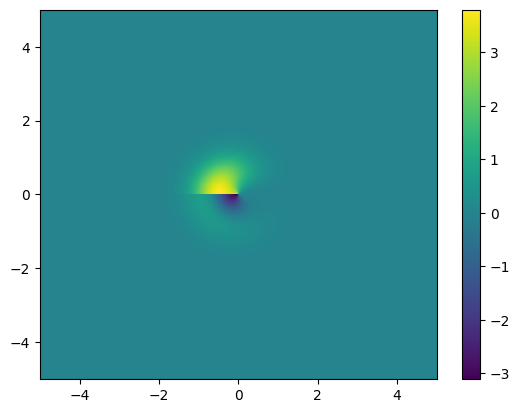

In [92]:
psm = plt.pcolormesh(X, Y, partial_twisted_energy(X, Y) - twisted_energy(X, Y))
plt.colorbar(psm)
plt.show()

In [95]:
splay_n = lambdify((x, y), splay)
twist_n = lambdify((x, y), twist)
bend_n = lambdify((x, y), bend)

splay_gn = lambdify((x, y), splay_g)
twist_gn = lambdify((x, y), twist_g)
bend_gn = lambdify((x, y), bend_g)

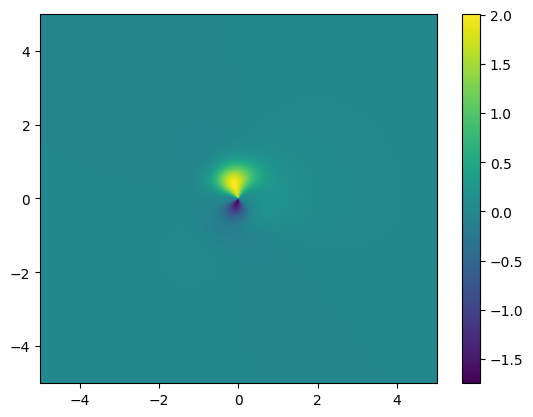

In [96]:
psm = plt.pcolormesh(X, Y, splay_n(X, Y) - splay_gn(X, Y))
plt.colorbar(psm)
plt.show()

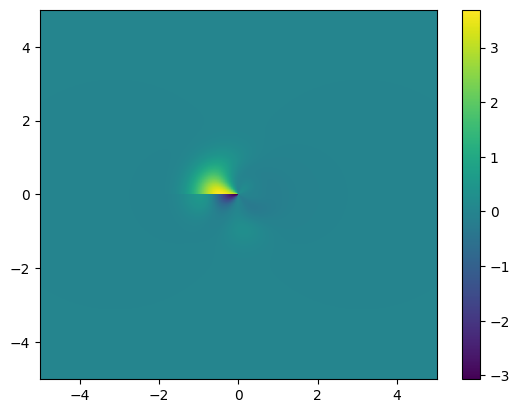

In [97]:
psm = plt.pcolormesh(X, Y, twist_n(X, Y) - twist_gn(X, Y))
plt.colorbar(psm)
plt.show()

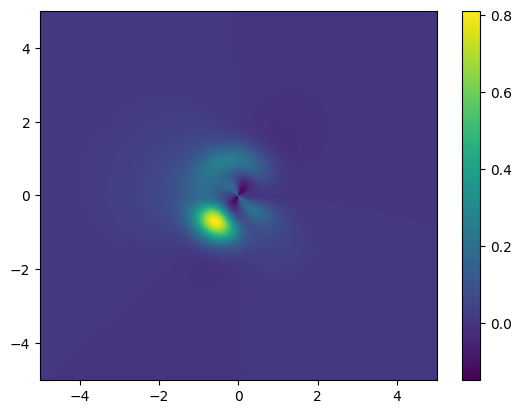

In [98]:
psm = plt.pcolormesh(X, Y, bend_n(X, Y) - bend_gn(X, Y))
plt.colorbar(psm)
plt.show()